In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, Activation
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout,
    BatchNormalization, Activation
)
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import io
import ipywidgets as widgets
from IPython.display import display, clear_output, Image as IPImage
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def load_and_preprocess_data(data_dir):
    image_files = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                image_files.append(image_path)
                labels.append(label)
    return image_files, labels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
import os
import pathlib
import pandas as pd
import cv2
import PIL
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define dataset paths
data_dir_train = pathlib.Path("/content/drive/MyDrive/skin cancer/Trainisic2017")
data_dir_test = pathlib.Path("/content/drive/MyDrive/skin cancer/Testisic2017")

# Define parameters
batch_size = 32
img_height = 224
img_width = 224
epochs = 20

# Function to remove hair using FFT
def remove_hair_fft(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)

    # Create a mask to suppress high-frequency hair components
    rows, cols = gray.shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - 30:crow + 30, ccol - 30:ccol + 30] = 0  # Suppress high frequencies

    fshift = fshift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    # Normalize and convert to 3-channel
    img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)
    img_back = cv2.cvtColor(img_back.astype(np.uint8), cv2.COLOR_GRAY2RGB)

    return img_back

# Function to apply CLAHE for contrast enhancement
def enhance_contrast(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    l = clahe.apply(l)
    lab = cv2.merge([l, a, b])
    enhanced = cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)
    return enhanced

# Function to normalize illumination
def normalize_illumination(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    img_norm = cv2.equalizeHist(img_gray)
    img_norm = cv2.cvtColor(img_norm, cv2.COLOR_GRAY2RGB)
    return img_norm

# Function to apply all preprocessing steps
def preprocess_image(image):
    image = remove_hair_fft(image)  # Using FFT instead of morphological operations
    image = enhance_contrast(image)
    image = normalize_illumination(image)
    image = cv2.resize(image, (img_height, img_width))
    image = image / 255.0  # Normalize to [0,1]
    return image

# Function to preprocess dataset and save images
def preprocess_dataset(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for class_folder in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_folder)
        save_class_path = os.path.join(output_dir, class_folder)

        if not os.path.exists(save_class_path):
            os.makedirs(save_class_path)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            if image is not None:
                image = preprocess_image(image)
                save_path = os.path.join(save_class_path, img_name)
                cv2.imwrite(save_path, (image * 255).astype(np.uint8))  # Convert back to 0-255
                print(f"Preprocessed: {img_name}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Preprocess images.
preprocessed_train_dir = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"
preprocessed_test_dir = "/content/drive/MyDrive/skin cancer/Preprocessed_Test"
preprocess_dataset(str(data_dir_train), preprocessed_train_dir)
preprocess_dataset(str(data_dir_test), preprocessed_test_dir)

Preprocessed: ISIC_0000544.jpg


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf  # Import TensorFlow

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',

)

Found 2000 files belonging to 3 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
    seed=123,
    subset="validation",
    validation_split=0.2
)

Found 2000 files belonging to 3 classes.
Using 400 files for validation.


In [ ]:
# Load dataset (example: using image_dataset_from_directory)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/skin cancer/Preprocessed_Train",  # Change this to your actual dataset path
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

# Access class names immediately after loading the dataset
class_names = train_ds.class_names
num_classes = len(class_names)

# Now apply performance optimizations
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 2000 files belonging to 3 classes.


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width),
    label_mode='categorical',
    seed=123,
    subset="training",
    validation_split=0.2
)

Found 2000 files belonging to 3 classes.
Using 1600 files for training.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    preprocessed_test_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 750 files belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import layers, models

# Load the DenseNet169 model pre-trained on ImageNet
base_model = DenseNet169(weights='imagenet',
                         include_top=False,  # Exclude top classification layers
                         input_shape=(224, 224, 3))  # DenseNet expects 224x224 input

# Freeze the base model layers
base_model.trainable = False

# Create the model
model = models.Sequential()

# Add the DenseNet169 base model
model.add(base_model)

# Optional: Rescaling if not done during preprocessing pipeline
# (but DenseNet expects preprocessed inputs, not raw [0-1])
# So either use:
# from tensorflow.keras.applications.densenet import preprocess_input
# in the data pipeline, or remove Rescaling

# Global Average Pooling (better than Flatten for CNNs)
model.add(layers.GlobalAveragePooling2D())

# Dense layer
model.add(layers.Dense(128, activation='relu'))

# Dropout layer
model.add(layers.Dropout(0.25))

# Output layer
model.add(layers.Dense(len(class_names), activation='softmax'))

# Summary of the model
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet169 (Functional)        │ (None, 7, 7, 1664)     │    12,642,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1664)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       213,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,856,387 (49.04 MB)

 Trainable params: 213,507 (834.01 KB)

 Non-trainable params: 12,642,880 (48.23 MB)

In [ ]:
# Define parameters
batch_size = 32
img_height = 224  # Changed to 224
img_width = 224   # Changed to 224
epochs = 20

# ... (Rest of the code) ...


# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/skin cancer/Preprocessed_Train",
    image_size=(img_height, img_width),  # Now uses 224x224
    batch_size=batch_size,
    label_mode='categorical'
)

# ... (Similarly update val_ds and test_ds with image_size=(224, 224)) ...

Found 2000 files belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load DenseNet169 without top layers
base_model = DenseNet169(weights='imagenet',
                         include_top=False,
                         input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze convolutional base

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(class_names), activation='softmax')  # Number of classes
])

# Compile the model
optimizer = Adam()
loss_fn = "categorical_crossentropy"
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])

# Print model summary (optional)
model.summary()

# Set training hyperparameters
epochs = 20
batch_size = 32

# Train the model
history = model.fit(
    train_ds,
    batch_size=batch_size,
    validation_data=val_ds,
    epochs=epochs
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet169 (Functional)        │ (None, 7, 7, 1664)     │    12,642,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 1664)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       213,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,856,387 (49.04 MB)

 Trainable params: 213,507 (834.01 KB)

 Non-trainable params: 12,642,880 (48.23 MB)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 625s 12s/step - accuracy: 0.5103 - loss: 5.0090 - val_accuracy: 0.6750 - val_loss: 0.8714
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 234ms/step - accuracy: 0.6436 - loss: 0.9313 - val_accuracy: 0.6860 - val_loss: 0.8204
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 327ms/step - accuracy: 0.6732 - loss: 0.8770 - val_accuracy: 0.6860 - val_loss: 0.8233
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.6776 - loss: 0.8423 - val_accuracy: 0.6860 - val_loss: 0.8060
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 248ms/step - accuracy: 0.6863 - loss: 0.8446 - val_accuracy: 0.6860 - val_loss: 0.8047
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 334ms/step - accuracy: 0.6735 - loss: 0.8253 - val_accuracy: 0.6860 - val_loss: 0.7923
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 305ms/step - accuracy: 0.6765 - loss: 0.8359 - val_accuracy: 0.6860 - val_loss: 0.8008
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 329ms/step - accuracy: 0.6908 - loss: 0.8213 - val_accur

50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - accuracy: 0.6765 - loss: 0.7693
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.6787 - loss: 0.7565
Accuracy:  0.6831250190734863
Validation Accuracy:  0.6869999766349792
Loss:  0.755221962928772
Validation Loss 0.7517114877700806


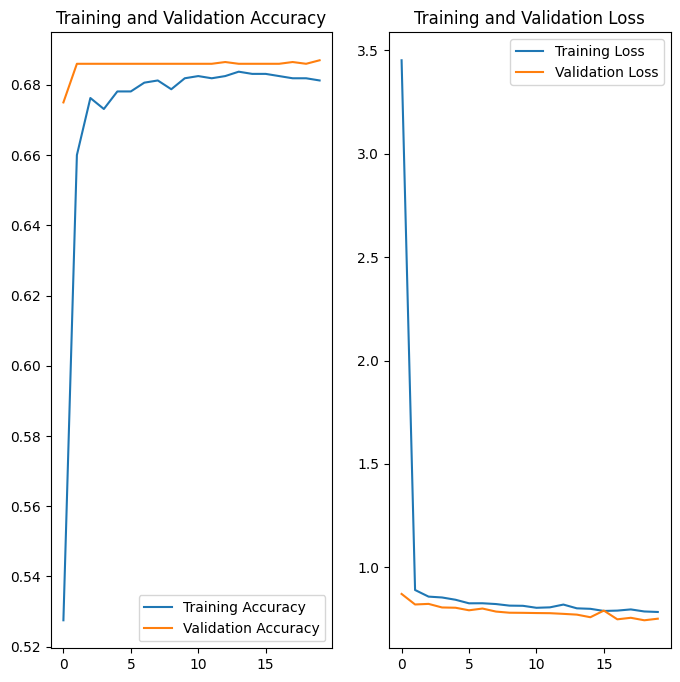

In [ ]:
import matplotlib.pyplot as plt

# Extracting the accuracy and loss for both training and validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs
epochs_range = range(epochs)

# Create a figure with subplots for accuracy and loss
plt.figure(figsize=(8, 8))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet169

# Define image dimensions and number of classes
img_height = 224
img_width = 224
num_classes = 3  # replace with your actual number of classes

# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.9),
    layers.RandomZoom(0.9),
])

# Load Pre-trained DenseNet169 Model
densenet_base = DenseNet169(
    weights="imagenet",       # Use pre-trained weights on ImageNet
    include_top=False,        # Exclude final classification layers
    input_shape=(img_height, img_width, 3)
)

# Freeze the base model
densenet_base.trainable = False

# Build the Model
model = keras.Sequential([
    data_augmentation,
    densenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the Model
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Summary of the Model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_5 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet169 (Functional)        │ (None, 7, 7, 1664)     │    12,642,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1664)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       213,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,856,387 (49.04 MB)

 Trainable params: 213,507 (834.01 KB)

 Non-trainable params: 12,642,880 (48.23 MB)

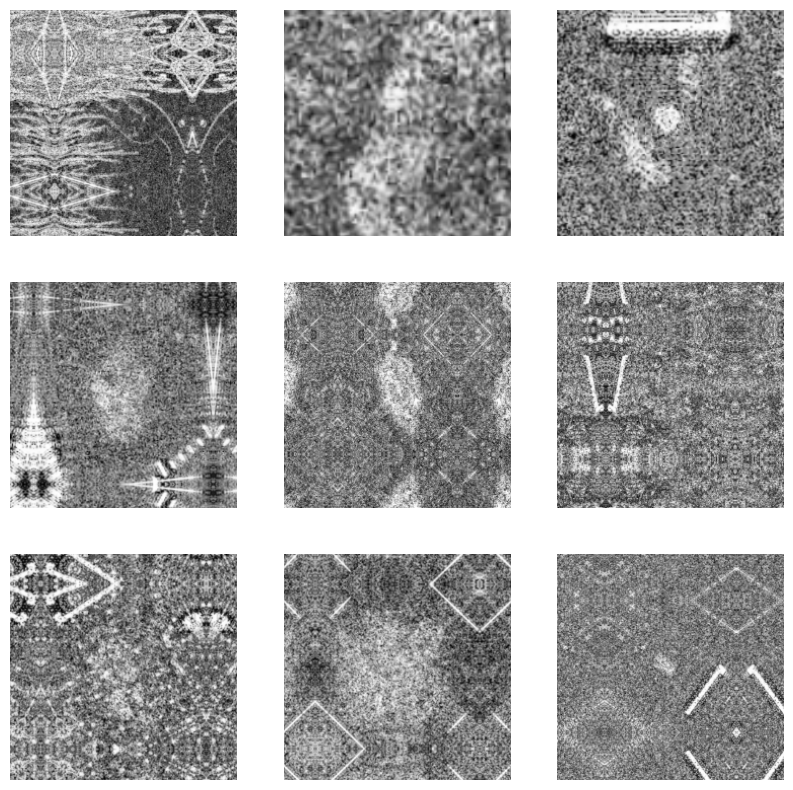

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Make sure data_augmentation and train_ds are defined
# Example: train_ds = tf.keras.utils.image_dataset_from_directory(...)

# Visualize augmented images
plt.figure(figsize=(10, 10))

for images, _ in train_ds.take(1):  # Take one batch from the dataset
    augmented_images = data_augmentation(images)  # Apply augmentation to the whole batch
    for i in range(9):  # Show first 9 images from the batch
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

plt.show()


In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor
import os

# Path to your dataset
path_to_training_dataset = "/content/drive/MyDrive/skin cancer/Preprocessed_Train"
output_path = "/content/drive/MyDrive/skin cancer/dencenet_output"

# List of class names (subdirectories in the training dataset)
class_names = ['melanoma', 'nevus', 'seborrheic keratosis']
# Augmentation threshold (500 images per class)
target_count = 2500

for class_name in class_names:
    class_path = os.path.join(path_to_training_dataset, class_name)
    p = Augmentor.Pipeline(class_path, output_directory=os.path.join(output_path, class_name))

    # Get the current number of images in the class folder
    num_current_images = len(os.listdir(class_path))

    # Calculate how many images need to be augmented to reach 500
    num_samples = max(target_count - num_current_images, 0)

    # Apply augmentations
    if num_samples > 0:
        p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
        # Add other augmentation operations as needed (e.g., zoom, flip, etc.)
        p.sample(num_samples)

    print(f"Augmentation for {class_name} complete.")


Initialised with 374 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/dencenet_output/melanoma.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7D7A444B14D0>: 100%|██████████| 2126/2126 [00:24<00:00, 85.15 Samples/s]


Augmentation for melanoma complete.
Initialised with 1372 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/dencenet_output/nevus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=180x180 at 0x7D7A55F609D0>: 100%|██████████| 1128/1128 [00:13<00:00, 85.10 Samples/s]


Augmentation for nevus complete.
Initialised with 254 image(s) found.
Output directory set to /content/drive/MyDrive/skin cancer/dencenet_output/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=180x180 at 0x7D7A556F7E90>: 100%|██████████| 2246/2246 [00:26<00:00, 84.46 Samples/s]

Augmentation for seborrheic keratosis complete.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
import os

augmented_output_path = "/content/drive/MyDrive/skin cancer/dencenet_output"
class_names = ['melanoma', 'nevus','seborrheic keratosis']

for class_name in class_names:
  class_folder_path = os.path.join(augmented_output_path, class_name)
  num_augmented_images = len(os.listdir(class_folder_path))
  print(f"Class: {class_name}, Number of augmented images: {num_augmented_images}")

Class: melanoma, Number of augmented images: 2500
Class: nevus, Number of augmented images: 2500
Class: seborrheic keratosis, Number of augmented images: 2500


In [ ]:

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img, save_img
import numpy as np
import random

# Paths
input_path = "/content/drive/MyDrive/skin cancer/dencenet_output"
target_count = 2500
class_names = ['melanoma', 'nevus', 'seborrheic keratosis']

# Define augmentation
augmenter = ImageDataGenerator(
    rotation_range=40,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

for class_name in class_names:
    class_dir = os.path.join(input_path, class_name)
    images = os.listdir(class_dir)
    current_count = len(images)
    images_needed = target_count - current_count

    if images_needed > 0:
        print(f"Augmenting {images_needed} images for class: {class_name}")
        for i in range(images_needed):
            img_name = random.choice(images)
            img_path = os.path.join(class_dir, img_name)

            # Load and preprocess image
            img = load_img(img_path, target_size=(224, 224))
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Generate augmented image
            aug_iter = augmenter.flow(x, batch_size=1)
            aug_img = next(aug_iter)[0].astype(np.uint8)

            # Save new image
            save_path = os.path.join(class_dir, f"augmented_{current_count + i}.jpg")
            save_img(save_path, aug_img)
    else:
        print(f"{class_name} already has {current_count} images, no need to augment.")


melanoma already has 2500 images, no need to augment.
nevus already has 2500 images, no need to augment.
seborrheic keratosis already has 2500 images, no need to augment.


In [ ]:
import os

data_dir_train = "/content/drive/MyDrive/skin cancer/dencenet_output"
for class_name in os.listdir(data_dir_train):
    class_path = os.path.join(data_dir_train, class_name)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
        print(f"{class_name}: {count} images")


melanoma: 2500 images
nevus: 2500 images
seborrheic keratosis: 2500 images


In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)


Found 7500 files belonging to 3 classes.
Using 6000 files for training.
Found 7500 files belonging to 3 classes.
Using 1500 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dense, Dropout,
                                     BatchNormalization, GlobalAveragePooling2D, ReLU)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Input
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# Base Model - DenseNet169
base_model = DenseNet169(weights='imagenet', include_top=False, input_tensor=inputs)

# Freeze initial layers and unfreeze the last block
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Base model output
x = base_model.output

# Extra Conv Block
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Global average pooling
x = GlobalAveragePooling2D()(x)
x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(3, activation='softmax')(x)

# Model definition
model = Model(inputs, outputs)

# Optimizer and compile
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

# Model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 16,545,603 (63.12 MB)

 Trainable params: 4,877,187 (18.60 MB)

 Non-trainable params: 11,668,416 (44.51 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Set epochs to 30
    callbacks=callbacks
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 191s 512ms/step - accuracy: 0.4707 - loss: 1.7484 - val_accuracy: 0.5400 - val_loss: 1.3102 - learning_rate: 1.0000e-04
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.5387 - loss: 1.4763 - val_accuracy: 0.5927 - val_loss: 1.2640 - learning_rate: 1.0000e-04
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 133ms/step - accuracy: 0.5643 - loss: 1.3633 - val_accuracy: 0.6293 - val_loss: 1.2404 - learning_rate: 1.0000e-04
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - accuracy: 0.5867 - loss: 1.3246 - val_accuracy: 0.6560 - val_loss: 1.1102 - learning_rate: 1.0000e-04
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 129ms/step - accuracy: 0.6221 - loss: 1.1948 - val_accuracy: 0.6233 - val_loss: 1.1404 - learning_rate: 1.0000e-04
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 127ms/step - accuracy: 0.6527 - loss: 1.1293 - val_accuracy: 0.6447 - val_loss: 1.2545 - learning_rate: 1.0000e-04
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 25s 1

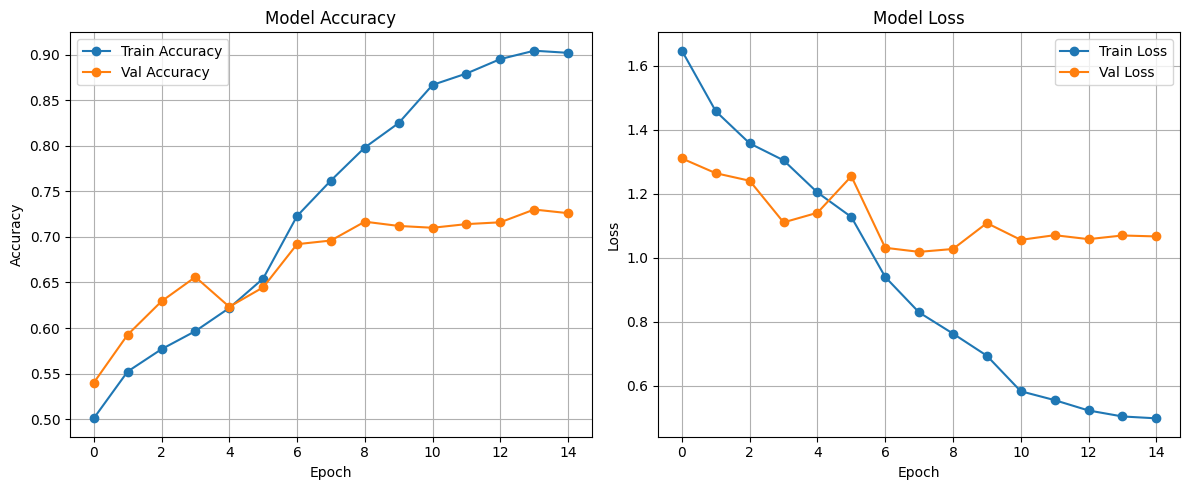

188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - accuracy: 0.8202 - loss: 0.6687
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.6981 - loss: 1.0339
Accuracy:  0.8308333158493042
Validation Accuracy:  0.6959999799728394
Loss:  0.6610071063041687
Validation Loss 1.018044352531433


In [ ]:
import matplotlib.pyplot as plt



# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dense, Dropout,
                                     BatchNormalization, GlobalAveragePooling2D,
                                     GlobalMaxPooling2D, ReLU, Concatenate)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Input
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# Base Model
base_model = DenseNet169(weights='imagenet', include_top=False, input_tensor=inputs)

# Freeze fewer layers — allow deeper fine-tuning
for layer in base_model.layers[:-80]:  # You can tune this number
    layer.trainable = False
for layer in base_model.layers[-80:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Base output
x = base_model.output

# Extra conv block
x = Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.4)(x)

# Combine Global Pooling methods
gap = GlobalAveragePooling2D()(x)
gmp = GlobalMaxPooling2D()(x)
x = Concatenate()([gap, gmp])

# Dense layers
x = Dense(512, kernel_regularizer=l2(0.001))(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output layer
outputs = Dense(3, activation='softmax')(x)

# Model
model = Model(inputs, outputs)

# Compile
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

# Summary
model.summary()


51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 16,875,843 (64.38 MB)

 Trainable params: 6,747,523 (25.74 MB)

 Non-trainable params: 10,128,320 (38.64 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Set epochs to 30
    callbacks=callbacks
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 1902s 10s/step - accuracy: 0.4363 - loss: 2.6741 - val_accuracy: 0.5413 - val_loss: 2.0933 - learning_rate: 1.0000e-04
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 143ms/step - accuracy: 0.5020 - loss: 2.3357 - val_accuracy: 0.5820 - val_loss: 2.0231 - learning_rate: 1.0000e-04
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 147ms/step - accuracy: 0.5071 - loss: 2.2492 - val_accuracy: 0.6300 - val_loss: 1.9421 - learning_rate: 1.0000e-04
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.5395 - loss: 2.1554 - val_accuracy: 0.6180 - val_loss: 1.9325 - learning_rate: 1.0000e-04
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 149ms/step - accuracy: 0.5687 - loss: 2.1106 - val_accuracy: 0.6167 - val_loss: 1.9054 - learning_rate: 1.0000e-04
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 148ms/step - accuracy: 0.5763 - loss: 2.0613 - val_accuracy: 0.6167 - val_loss: 1.8857 - learning_rate: 1.0000e-04
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 15

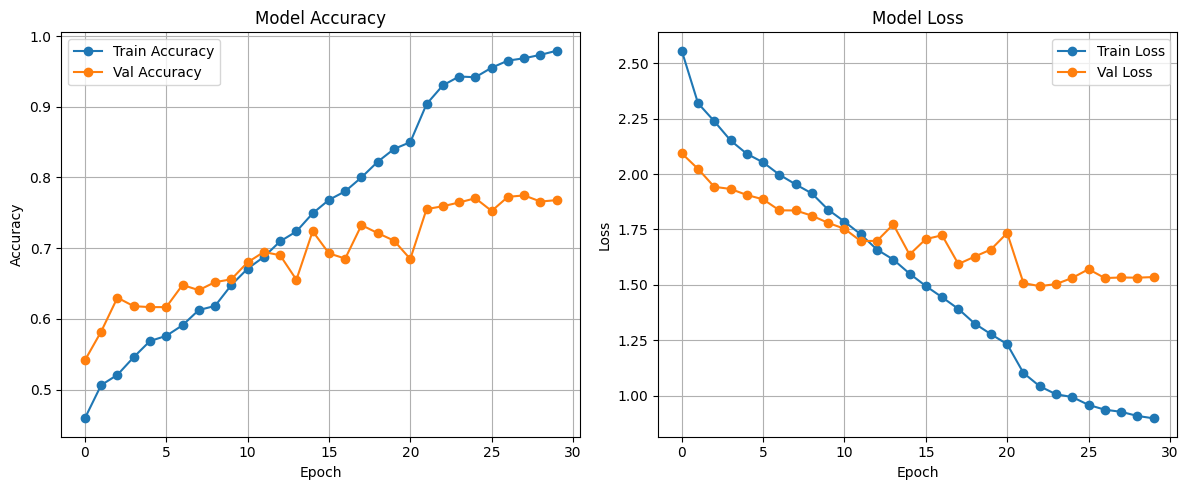

188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 166ms/step - accuracy: 0.9839 - loss: 0.9624
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.7495 - loss: 1.5023
Accuracy:  0.9856666922569275
Validation Accuracy:  0.7593333125114441
Loss:  0.9567959904670715
Validation Loss 1.4938452243804932


In [ ]:
import matplotlib.pyplot as plt



# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,  # Set epochs to 30
    callbacks=callbacks
)

Epoch 1/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 152ms/step - accuracy: 0.9412 - loss: 1.0183 - val_accuracy: 0.7733 - val_loss: 1.4971 - learning_rate: 2.7000e-06
Epoch 2/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 150ms/step - accuracy: 0.9509 - loss: 0.9993 - val_accuracy: 0.7733 - val_loss: 1.4922 - learning_rate: 2.7000e-06
Epoch 3/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 146ms/step - accuracy: 0.9548 - loss: 0.9808 - val_accuracy: 0.7693 - val_loss: 1.4982 - learning_rate: 2.7000e-06
Epoch 4/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.9531 - loss: 0.9868 - val_accuracy: 0.7733 - val_loss: 1.4996 - learning_rate: 2.7000e-06
Epoch 5/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.9550 - loss: 0.9901 - val_accuracy: 0.7747 - val_loss: 1.5039 - learning_rate: 2.7000e-06
Epoch 6/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 148ms/step - accuracy: 0.9483 - loss: 0.9936 - val_accuracy: 0.7713 - val_loss: 1.5028 - learning_rate: 1.0000e-06
Epoch 7/50
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 14

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dense, Dropout,
                                     BatchNormalization, GlobalAveragePooling2D,
                                     GlobalMaxPooling2D, ReLU, Concatenate)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Input shape
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# Base model
base_model = DenseNet169(include_top=False, weights='imagenet', input_tensor=inputs)

# Fine-tuning strategy: freeze base layers except the last 40
for layer in base_model.layers[:-40]:
    layer.trainable = False
for layer in base_model.layers[-40:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

# Custom top layers
x = base_model.output
x = Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0005))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

gap = GlobalAveragePooling2D()(x)
gmp = GlobalMaxPooling2D()(x)
x = Concatenate()([gap, gmp])

x = Dense(512, kernel_regularizer=l2(0.0005))(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(256, kernel_regularizer=l2(0.0005))(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

outputs = Dense(3, activation='softmax')(x)

# Build model
model = Model(inputs, outputs)

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6)
callbacks = [early_stop, reduce_lr]

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 16,875,843 (64.38 MB)

 Trainable params: 5,475,907 (20.89 MB)

 Non-trainable params: 11,399,936 (43.49 MB)

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,  # Set epochs to 30
    callbacks=callbacks
)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 122s 394ms/step - accuracy: 0.4316 - loss: 2.0339 - val_accuracy: 0.5973 - val_loss: 1.5388 - learning_rate: 1.0000e-04
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step - accuracy: 0.5057 - loss: 1.7466 - val_accuracy: 0.5887 - val_loss: 1.4897 - learning_rate: 1.0000e-04
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 139ms/step - accuracy: 0.5332 - loss: 1.6677 - val_accuracy: 0.5940 - val_loss: 1.4962 - learning_rate: 1.0000e-04
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 137ms/step - accuracy: 0.5526 - loss: 1.6070 - val_accuracy: 0.5887 - val_loss: 1.5030 - learning_rate: 1.0000e-04
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - accuracy: 0.5794 - loss: 1.5650 - val_accuracy: 0.6133 - val_loss: 1.4465 - learning_rate: 1.0000e-04
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 139ms/step - accuracy: 0.5937 - loss: 1.5305 - val_accuracy: 0.6080 - val_loss: 1.4517 - learning_rate: 1.0000e-04
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 1

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Dense, Dropout,
                                     BatchNormalization, GlobalAveragePooling2D,
                                     GlobalMaxPooling2D, ReLU, Concatenate)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers.schedules import CosineDecayRestarts

# Input
input_shape = (224, 224, 3)
inputs = Input(shape=input_shape)

# Base Model
base_model = DenseNet169(include_top=False, weights='imagenet', input_tensor=inputs)

# Unfreeze last 60 layers (deep fine-tuning)
for layer in base_model.layers[:-60]:
    layer.trainable = False
for layer in base_model.layers[-60:]:
    if not isinstance(layer, tf.keras.layers.BatchNormalization):
        layer.trainable = True

x = base_model.output

# Conv Block
x = Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(1e-4))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.5)(x)

# Dual Pooling
gap = GlobalAveragePooling2D()(x)
gmp = GlobalMaxPooling2D()(x)
x = Concatenate()([gap, gmp])

# Dense layers
x = Dense(512, kernel_regularizer=l2(1e-4))(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, kernel_regularizer=l2(1e-4))(x)
x = ReLU()(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

# Output
outputs = Dense(3, activation='softmax')(x)

# Model
model = Model(inputs, outputs)

# Optimizer with Cosine Decay Learning Rate
lr_schedule = CosineDecayRestarts(initial_learning_rate=1e-4, first_decay_steps=10, t_mul=2.0)
optimizer = Adam(learning_rate=lr_schedule, clipnorm=1.0)

# Compile with label smoothing
model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, min_lr=1e-6)
checkpoint = ModelCheckpoint("best_model_densenet169.h5", monitor="val_accuracy", save_best_only=True)
callbacks = [early_stop, reduce_lr, checkpoint]

model.summary()


51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 16,875,843 (64.38 MB)

 Trainable params: 6,148,867 (23.46 MB)

 Non-trainable params: 10,726,976 (40.92 MB)

In [ ]:
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=callbacks
)


Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.4403 - loss: 1.5930

188/188 ━━━━━━━━━━━━━━━━━━━━ 1777s 10s/step - accuracy: 0.4403 - loss: 1.5929 - val_accuracy: 0.5673 - val_loss: 1.1199 - learning_rate: 7.0037e-05
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4732 - loss: 1.4678

188/188 ━━━━━━━━━━━━━━━━━━━━ 79s 183ms/step - accuracy: 0.4732 - loss: 1.4677 - val_accuracy: 0.5960 - val_loss: 1.0849 - learning_rate: 8.2844e-05
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4763 - loss: 1.4356

188/188 ━━━━━━━━━━━━━━━━━━━━ 36s 155ms/step - accuracy: 0.4764 - loss: 1.4355 - val_accuracy: 0.6040 - val_loss: 1.0684 - learning_rate: 4.8005e-06
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5066 - loss: 1.3770

188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.5065 - loss: 1.3769 - val_accuracy: 0.6080 - val_loss: 1.0726 - learning_rate: 8.8179e-05
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.5006 - loss: 1.3253 - val_accuracy: 0.6060 - val_loss: 1.0320 - learning_rate: 4.7302e-05
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.5238 - loss: 1.3111

188/188 ━━━━━━━━━━━━━━━━━━━━ 47s 181ms/step - accuracy: 0.5238 - loss: 1.3111 - val_accuracy: 0.6247 - val_loss: 1.0218 - learning_rate: 8.5634e-06
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 146ms/step - accuracy: 0.5460 - loss: 1.2551 - val_accuracy: 0.6187 - val_loss: 1.0383 - learning_rate: 9.9325e-05
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.5286 - loss: 1.2895 - val_accuracy: 0.6100 - val_loss: 1.0369 - learning_rate: 9.0523e-05
Epoch 9/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5446 - loss: 1.2328

188/188 ━━━━━━━━━━━━━━━━━━━━ 43s 157ms/step - accuracy: 0.5447 - loss: 1.2327 - val_accuracy: 0.6373 - val_loss: 1.0205 - learning_rate: 7.3245e-05
Epoch 10/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.5725 - loss: 1.1756

188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 153ms/step - accuracy: 0.5725 - loss: 1.1756 - val_accuracy: 0.6473 - val_loss: 1.0041 - learning_rate: 5.1104e-05
Epoch 11/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 145ms/step - accuracy: 0.5673 - loss: 1.1726 - val_accuracy: 0.6453 - val_loss: 0.9987 - learning_rate: 2.8733e-05
Epoch 12/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5895 - loss: 1.1510

188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 155ms/step - accuracy: 0.5895 - loss: 1.1510 - val_accuracy: 0.6547 - val_loss: 0.9918 - learning_rate: 1.0810e-05
Epoch 13/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6028 - loss: 1.1186

188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 153ms/step - accuracy: 0.6028 - loss: 1.1186 - val_accuracy: 0.6553 - val_loss: 0.9897 - learning_rate: 1.0841e-06
Epoch 14/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.5952 - loss: 1.1088

188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 150ms/step - accuracy: 0.5952 - loss: 1.1089 - val_accuracy: 0.6567 - val_loss: 0.9979 - learning_rate: 9.9601e-05
Epoch 15/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.5937 - loss: 1.1151 - val_accuracy: 0.6553 - val_loss: 0.9788 - learning_rate: 9.6846e-05
Epoch 16/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.6150 - loss: 1.0857

188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 153ms/step - accuracy: 0.6151 - loss: 1.0857 - val_accuracy: 0.6680 - val_loss: 0.9671 - learning_rate: 9.1608e-05
Epoch 17/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.6361 - loss: 1.0677

188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 154ms/step - accuracy: 0.6361 - loss: 1.0676 - val_accuracy: 0.6767 - val_loss: 0.9626 - learning_rate: 8.4165e-05
Epoch 18/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6454 - loss: 1.0519

188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.6454 - loss: 1.0518 - val_accuracy: 0.6913 - val_loss: 0.9362 - learning_rate: 7.4911e-05
Epoch 19/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6633 - loss: 0.9913

188/188 ━━━━━━━━━━━━━━━━━━━━ 29s 156ms/step - accuracy: 0.6634 - loss: 0.9913 - val_accuracy: 0.7047 - val_loss: 0.9290 - learning_rate: 6.4338e-05
Epoch 20/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.6825 - loss: 0.9634

188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 158ms/step - accuracy: 0.6825 - loss: 0.9633 - val_accuracy: 0.7080 - val_loss: 0.9112 - learning_rate: 5.3005e-05
Epoch 21/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.7111 - loss: 0.9308

188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 183ms/step - accuracy: 0.7111 - loss: 0.9308 - val_accuracy: 0.7233 - val_loss: 0.8946 - learning_rate: 4.1512e-05
Epoch 22/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7171 - loss: 0.9005

188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 156ms/step - accuracy: 0.7172 - loss: 0.9004 - val_accuracy: 0.7307 - val_loss: 0.8856 - learning_rate: 3.0470e-05
Epoch 23/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7415 - loss: 0.8677

188/188 ━━━━━━━━━━━━━━━━━━━━ 31s 163ms/step - accuracy: 0.7415 - loss: 0.8676 - val_accuracy: 0.7333 - val_loss: 0.8735 - learning_rate: 2.0462e-05
Epoch 24/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.7480 - loss: 0.8438

188/188 ━━━━━━━━━━━━━━━━━━━━ 34s 181ms/step - accuracy: 0.7481 - loss: 0.8438 - val_accuracy: 0.7413 - val_loss: 0.8646 - learning_rate: 1.2020e-05
Epoch 25/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7698 - loss: 0.8142

188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 158ms/step - accuracy: 0.7698 - loss: 0.8143 - val_accuracy: 0.7480 - val_loss: 0.8599 - learning_rate: 5.5898e-06
Epoch 26/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.7844 - loss: 0.7972

188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 157ms/step - accuracy: 0.7843 - loss: 0.7972 - val_accuracy: 0.7500 - val_loss: 0.8594 - learning_rate: 1.5134e-06
Epoch 27/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7706 - loss: 0.8071

188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 157ms/step - accuracy: 0.7706 - loss: 0.8071 - val_accuracy: 0.7507 - val_loss: 0.8582 - learning_rate: 6.3628e-09
Epoch 28/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 28s 147ms/step - accuracy: 0.7587 - loss: 0.8415 - val_accuracy: 0.7233 - val_loss: 0.8860 - learning_rate: 9.9712e-05
Epoch 29/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 27s 145ms/step - accuracy: 0.7418 - loss: 0.8732 - val_accuracy: 0.7333 - val_loss: 0.8769 - learning_rate: 9.8765e-05
Epoch 30/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 148ms/step - accuracy: 0.7584 - loss: 0.8301 - val_accuracy: 0.7233 - val_loss: 0.8836 - learning_rate: 9.7170e-05
